In [1]:
# import and setup

import sys
import os
import networkx as nx
import matplotlib.pyplot as plt
import random
import time

# Add parent directory to path so algorithms can be imported
sys.path.append(os.path.abspath("../algorithms"))

# Import algorithms
#from greedy import greedy_clique
#from local_search import local_search
from randomized import randomized_max_clique
from simulated_annealing import simulated_annealing_with_restarts
from bron_kerbosch import bron_kerbosch_with_pivot, bron_kerbosch_basic

print("All algorithms imported successfully.")

All algorithms imported successfully.


Graph generated with 20 nodes.


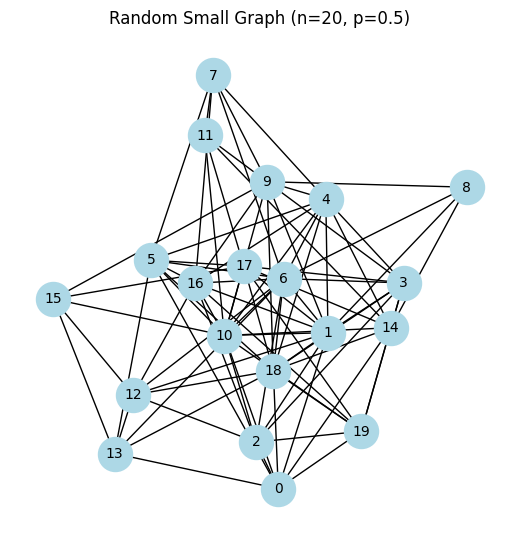

Graph created with 20 nodes and 86 edges.


In [2]:
# generate small graphs

def generate_random_graph_dict(num_nodes=10, edge_prob=0.4):
    """
    Generates a random undirected graph using the Erdos–Renyi model
    and returns it as a standard Adjacency Dictionary (Dict[int, set[int]]).
    """
    # 1. Initialize the adjacency dictionary for all nodes
    graph_dict = {i: set() for i in range(num_nodes)}
    
    # 2. Iterate over all unique pairs of nodes (u, v)
    #    This ensures the graph is undirected and has no self-loops.
    for u in range(num_nodes):
        for v in range(u + 1, num_nodes):
            
            # 3. Check if an edge should be created based on the probability
            if random.random() < edge_prob:
                # Add the edge (u, v) symmetrically
                graph_dict[u].add(v)
                graph_dict[v].add(u)
                
    return graph_dict

NUM_NODES = 20
EDGE_PROB = 0.5

# 1. Generate the graph in the standard Dictionary format (G_dict)
G_dict = generate_random_graph_dict(num_nodes=NUM_NODES, edge_prob=EDGE_PROB)

print(f"Graph generated with {len(G_dict)} nodes.")

# 2. Create a NetworkX Graph (G) ONLY for visualization purposes
G = nx.Graph(G_dict) 

# Visualize it
plt.figure(figsize=(5, 5))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=600, font_size=10)
# FIX: Use correct parameters in the title
plt.title(f"Random Small Graph (n={NUM_NODES}, p={EDGE_PROB})") 
plt.show()

# Set a consistent layout for all following plots
pos = nx.spring_layout(G, seed=42)
print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Simulated Annealing:
Clique size = 4
Clique nodes = {1, 18, 3, 4}
Runtime = 0.4325 sec


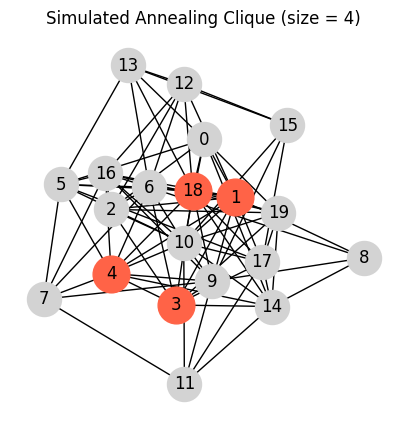

In [3]:
# --- Run Simulated Annealing Algorithm ---
start = time.time()

# 2. CALL THE CORRECT FUNCTION with the correct graph format
clique_s, sa_runtime, _ = simulated_annealing_with_restarts(
    G_dict, 
    num_restarts=10, 
    verbose=False
)
size_s = len(clique_s)
end = time.time()

print("\nSimulated Annealing:")
print(f"Clique size = {size_s}")
print(f"Clique nodes = {clique_s}")
print(f"Runtime = {end - start:.4f} sec")

# --- Visualization of Clique in Graph ---
# (This uses the original 'G' and 'pos' for plotting, which is correct)
plt.figure(figsize=(5,5))
nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=600)
nx.draw_networkx_nodes(G, pos, nodelist=clique_s, node_color='tomato', node_size=700)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_color='black')
plt.title(f"Simulated Annealing Clique (size = {size_s})")
plt.axis('off')
plt.show()

In [ ]:
# Greedy

In [ ]:
# Local search

Randomized Heuristic:
  Clique size  = 5
  Clique nodes = [4, 5, 6, 7, 16]
  Runtime      = 0.0002 sec


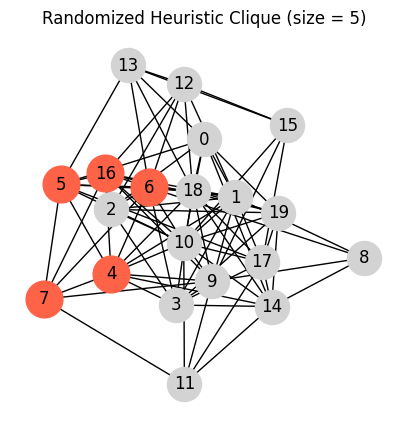

In [4]:
# --- Run Randomized Heuristic Algorithm ---
start = time.time()
size, clique, _ = randomized_max_clique(G_dict, restarts=10) 
end = time.time()

print(f"Randomized Heuristic:")
print(f"  Clique size  = {size}")
print(f"  Clique nodes = {clique}")
print(f"  Runtime      = {end - start:.4f} sec")

# --- Visualization of Randomized Clique ---
plt.figure(figsize=(5,5))
# draw all nodes
nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=600)
# highlight clique nodes
nx.draw_networkx_nodes(G, pos, nodelist=clique, node_color='tomato', node_size=700)
# draw edges
nx.draw_networkx_edges(G, pos)
# labels
nx.draw_networkx_labels(G, pos, font_color='black')

plt.title(f"Randomized Heuristic Clique (size = {size})")
plt.axis('off')
plt.show()


In [ ]:
#local random



=== Bron–Kerbosch (Basic) ===
Max Clique: {16, 1, 2, 6, 10}
Size: 5
Runtime: 0.0005 sec

=== Bron–Kerbosch (With Pivoting) ===
Max Clique: {1, 18, 3, 4, 9}
Size: 5
Runtime: 0.0004 sec


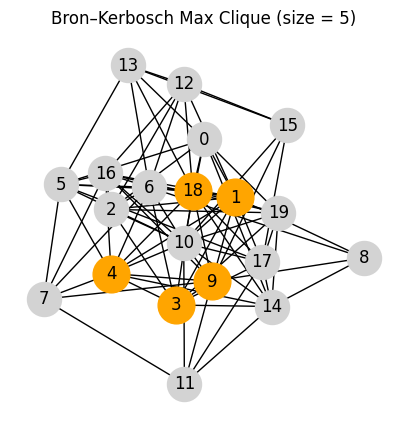

In [5]:
# bron kerbosch
# 2. Run Bron–Kerbosch (basic)
start_basic = time.time()
clique_basic, runtime_basic = bron_kerbosch_basic(G_dict)
end_basic = time.time()

# 3. Run Bron–Kerbosch (with pivot)
start_pivot = time.time()
clique_pivot, runtime_pivot = bron_kerbosch_with_pivot(G_dict)
end_pivot = time.time()

# --- Print Results ---
print("\n=== Bron–Kerbosch (Basic) ===")
print(f"Max Clique: {clique_basic}")
print(f"Size: {len(clique_basic)}")
print(f"Runtime: {end_basic - start_basic:.4f} sec")

print("\n=== Bron–Kerbosch (With Pivoting) ===")
print(f"Max Clique: {clique_pivot}")
print(f"Size: {len(clique_pivot)}")
print(f"Runtime: {end_pivot - start_pivot:.4f} sec")

# --- Visualization (show pivoting result) ---
plt.figure(figsize=(5,5))
nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=600)
nx.draw_networkx_nodes(G, pos, nodelist=clique_pivot, node_color='orange', node_size=700)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_color='black')
plt.title(f"Bron–Kerbosch Max Clique (size = {len(clique_pivot)})")
plt.axis('off')
plt.show()
